In [41]:
import pandas as pd
import matplotlib.pyplot as plt

from artificialdata import *
from stainer import *

# Data Example - Nullify + Function Transformation

In [42]:
angled_blob = pd.read_csv("data/sim_anneal/angled_blob.csv", index_col = 0)
less_angled_blob = pd.read_csv("data/sim_anneal/less_angled_blob.csv", index_col = 0)
random_cloud = pd.read_csv("data/sim_anneal/random_cloud.csv", index_col = 0)
slanted_less = pd.read_csv("data/sim_anneal/slanted_less.csv", index_col = 0)
dino = pd.read_csv("data/sim_anneal/Datasaurus_data.csv", header = None, names = ["x", "y"])

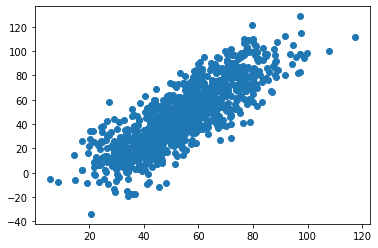

In [43]:
plt.scatter(x = "x", y = "y", data = angled_blob)
plt.show()

In [44]:
f = FunctionTransform(1, transformation = {"sq": lambda x: x**2, "cube": lambda x: x**3})

In [45]:
nul = Nullify(0.1, fixed_col = [1])

In [46]:
ddf = DirtyDF(angled_blob)

In [47]:
c = Combiner([nul, f], seed = 42)

In [48]:
c.transform_all(ddf)

In [49]:
ddf.get_full_history()

Replaced 100 values to become empty in specificed rows/cols. 

Converted column 0 with transformation sq. 
Converted column 1 with transformation cube. 



In [50]:
ddf.get_finalDF().head(10)

,x,y
0,2124.419861,146986.003069
1,2197.062762,576.718066
2,2193.506694,67067.347985
3,3039.110202,77755.140762
4,6179.342617,360472.891752
5,3844.974436,231097.867751
6,5285.497197,625040.995069
7,7340.966192,442301.706089
8,958.602204,-31.801229
9,4831.993472,465428.378517


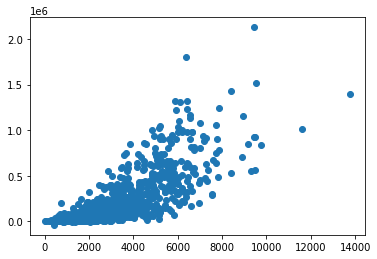

In [52]:
plt.scatter(x = "x", y = "y", data = ddf.get_finalDF())
plt.show()

# Data Example - Duplicated Rows

In [11]:
data = pd.read_csv("data/online_retail_small.csv", parse_dates = ["InvoiceDate"]) # Contains only first 5000 rows of the full data

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 312.6+ KB


In [14]:
# Fix rows 4950 - 5000 to be duplicated
add_dup_specified = AddDuplicate(0, fixed_row = [i for i in range(4950, 5000)])

In [15]:
# Any row can be duplicated with a 20% chance. Each duplication can result in up to 4 copies
add_dup = AddDuplicate(0.2, randomize_order = False, max_rep = 4)

In [16]:
ddf = DirtyDF(data, history = True)

In [17]:
ddf2 = DirtyDF(data)

In [18]:
c = Combiner([add_dup_specified, add_dup], random_order = True, seed = 300)

Randomisation complete with seed 300


In [19]:
c.stainers

In [20]:
ex1 = c.transform_all(ddf)
ex1.get_finalDF()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
7123,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7124,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7125,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7126,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom


In [21]:
ex2 = c.transform_all(ddf2)
ex2.get_finalDF()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
7011,536836,22198,LARGE POPCORN HOLDER,2,2010-02-12 18:08:00,1.65,18168.0,United Kingdom
7012,536836,22198,LARGE POPCORN HOLDER,2,2010-02-12 18:08:00,1.65,18168.0,United Kingdom
7013,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7014,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom


In [22]:
ddf3 = DirtyDF(data)
ddf4 = DirtyDF(data)

In [23]:
ex3 = c.transform_all(ddf3, seed = 100)
ex4 = c.transform_all(ddf4, seed = 100)

In [24]:
ex3.get_finalDF().equals(ex4.get_finalDF()) # Verifying seed works

True

In [25]:
# DF after the first step
ex1.summary[0].df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
5045,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-02-12 18:08:00,4.95,18168.0,United Kingdom
5046,536836,22198,LARGE POPCORN HOLDER,2,2010-02-12 18:08:00,1.65,18168.0,United Kingdom
5047,536836,22198,LARGE POPCORN HOLDER,2,2010-02-12 18:08:00,1.65,18168.0,United Kingdom
5048,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom


In [26]:
# Final result (After the second step)
print(f"Seed used: {ex1.summary[1].seed}")
ex1.get_finalDF()

Seed used: 16109887581


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
7123,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7124,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7125,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom
7126,536836,22197,SMALL POPCORN HOLDER,2,2010-02-12 18:08:00,0.85,18168.0,United Kingdom


In [27]:
print(f"Seed used: {ex2.summary[1].seed}")
# Different seeds used for ex1 and ex2

Seed used: 16109887582


In [28]:
ex1.get_full_history()

Added Duplicate Rows for 50 specified rows and 0 additional rows. 
Each duplicated row should appear a maximum of 2 times. 
Rows added: 50. 

Added Duplicate Rows for 0 specified rows and 1040 additional rows. 
Each duplicated row should appear a maximum of 4 times. 
Rows added: 2078. 



In [29]:
ex2.get_full_history()

Added Duplicate Rows for 50 specified rows and 0 additional rows. 
Each duplicated row should appear a maximum of 2 times. 
Rows added: 50. 

Added Duplicate Rows for 0 specified rows and 996 additional rows. 
Each duplicated row should appear a maximum of 4 times. 
Rows added: 1966. 

